## Iniciaremos con el EDA

Importamos las librerías que necesitaremos

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1. Preparamos el set de datos

In [29]:
archivo_hom = r"C:\Users\argui\OneDrive\Escritorio\Siniestros viales\Dataset\homicidios.csv"
archivo_vic = r"C:\Users\argui\OneDrive\Escritorio\Siniestros viales\Dataset\victimas.csv"

### 2. Damos un primer vistazo al dataset

In [30]:
#Insertamos el csv 'homicidios a un dataframe
df_h = pd.read_csv(archivo_hom,delimiter=';',encoding='latin-1')
df_h.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/01/2016,2016.0,1.0,1.0,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,2/01/2016,2016.0,1.0,2.0,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,3/01/2016,2016.0,1.0,3.0,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [31]:
#Inspeccionamos un poco el contenido del dataframe df_h
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10493 entries, 0 to 10492
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    float64
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    float64
 4   MM                     696 non-null    float64
 5   DD                     696 non-null    float64
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    float64
 15  XY

In [32]:
#También inspeccionamos la cantidad de nulos que contiene el df por columna
df_h.isna().sum()

ID                        9797
N_VICTIMAS                9797
FECHA                     9797
AAAA                      9797
MM                        9797
DD                        9797
HORA                      9797
HH                        9797
LUGAR_DEL_HECHO           9797
TIPO_DE_CALLE             9797
Calle                     9798
Altura                   10364
Cruce                     9968
Dirección Normalizada     9805
COMUNA                    9797
XY (CABA)                 9797
pos x                     9797
pos y                     9797
PARTICIPANTES             9797
VICTIMA                   9797
ACUSADO                   9797
dtype: int64

In [33]:
#Insertamos el csv victimas a un dataframe
df_v = pd.read_csv(archivo_vic,delimiter=';',encoding='latin-1' )
df_v.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/01/2016,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19,1/01/2016
1,2016-0002,2/01/2016,2016.0,1.0,2.0,CONDUCTOR,AUTO,MASCULINO,70,2/01/2016
2,2016-0003,3/01/2016,2016.0,1.0,3.0,CONDUCTOR,MOTO,MASCULINO,30,3/01/2016


In [34]:
#Inspeccionamos los datos de df_v
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 56.4+ KB


In [35]:
#También inspeccionamos la cantidad de datos nulos por columa
df_v.isna().sum()

ID_hecho               3
FECHA                  3
AAAA                   3
MM                     3
DD                     3
ROL                    3
VICTIMA                3
SEXO                   3
EDAD                   3
FECHA_FALLECIMIENTO    3
dtype: int64

### 3.Limpieza
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:
1. Datos faltantes
2. columnas irrelevantes 
3. Registros repetidos 
4. Valores extremos
5. Errores tipográficos

In [36]:
#Comenzaremos con la tabla df_h, eliminaremos las filas con todas las columnas vacías
df_h = df_h.dropna(axis=0,how='all')

#Lo mismo para df_v
df_v = df_v.dropna(axis=0,how='all')

In [37]:
#Inspeccionamos cómo quedó df_h
df_h.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [38]:
#Inspeccionamos cómo quedó df_v
df_v.isna().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [39]:
#Verificamos si hay filas repetidas en df_h
duplicados_h = df_h[df_h.duplicated(keep='first')]
duplicados_h

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [44]:
#Verificamos si hay filas repetidas en df_v
duplicados_v = df_v[df_v.duplicated(keep='first')]
duplicados_v

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


In [45]:
#Eliminamos columnas que no nos servirán
df_h = df_h.drop(columns=['FECHA','HORA','Altura','PARTICIPANTES'])
df_v = df_v.drop(columns=['FECHA','FECHA_FALLECIMIENTO'])

In [46]:
#Inspeccionamos datos estadísticos acerca de las tablas numéricas
df_v.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


### 4. Inspección de outliers

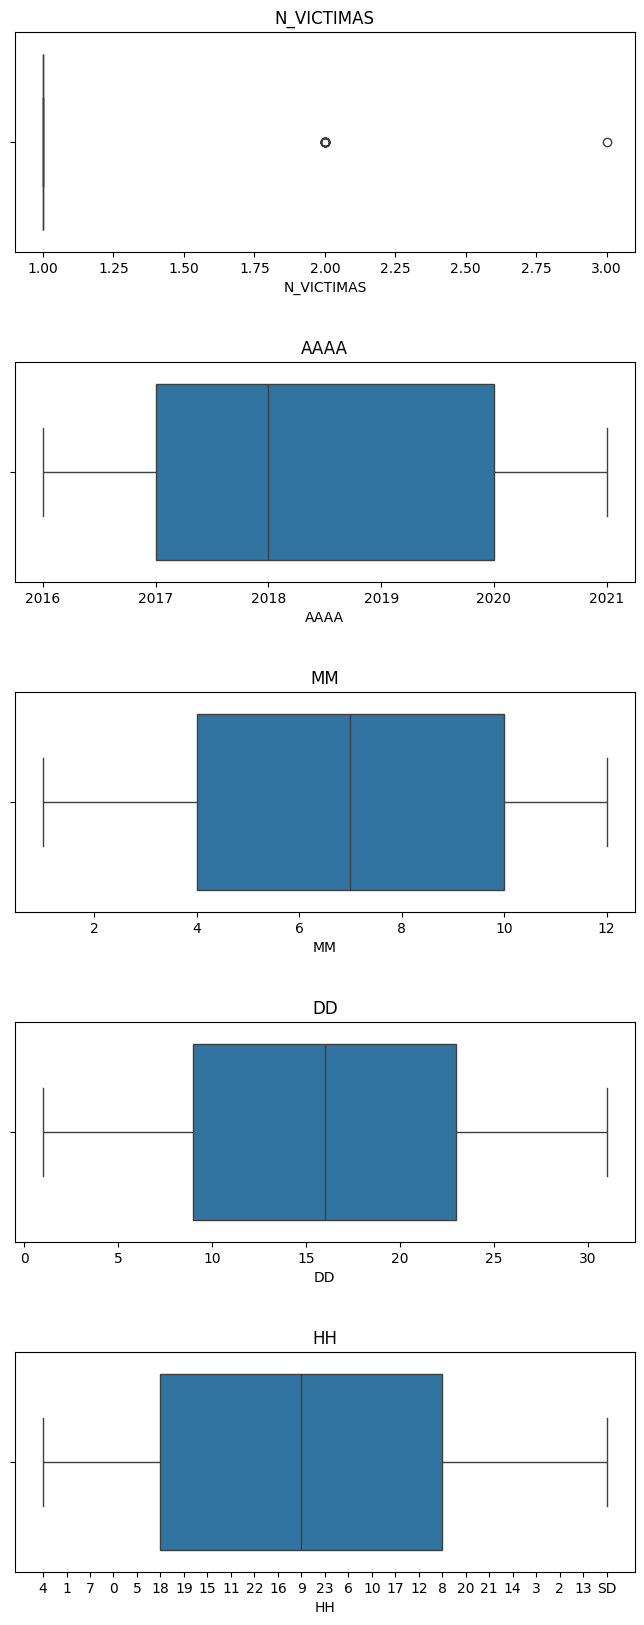

In [47]:
columns_h = ['N_VICTIMAS','AAAA','MM','DD','HH']
fig,ax = plt.subplots(nrows=5, ncols = 1,figsize=(8,20))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(columns_h):
          sns.boxplot(x=col, data=df_h, ax=ax[i])
          ax[i].set_title(col)

Esta exploración se realizó con el fin de observar posibles outliers y analizar si es conveniente eliminar el dato. No se encontró outliers por lo que el DataFrame se mantiene

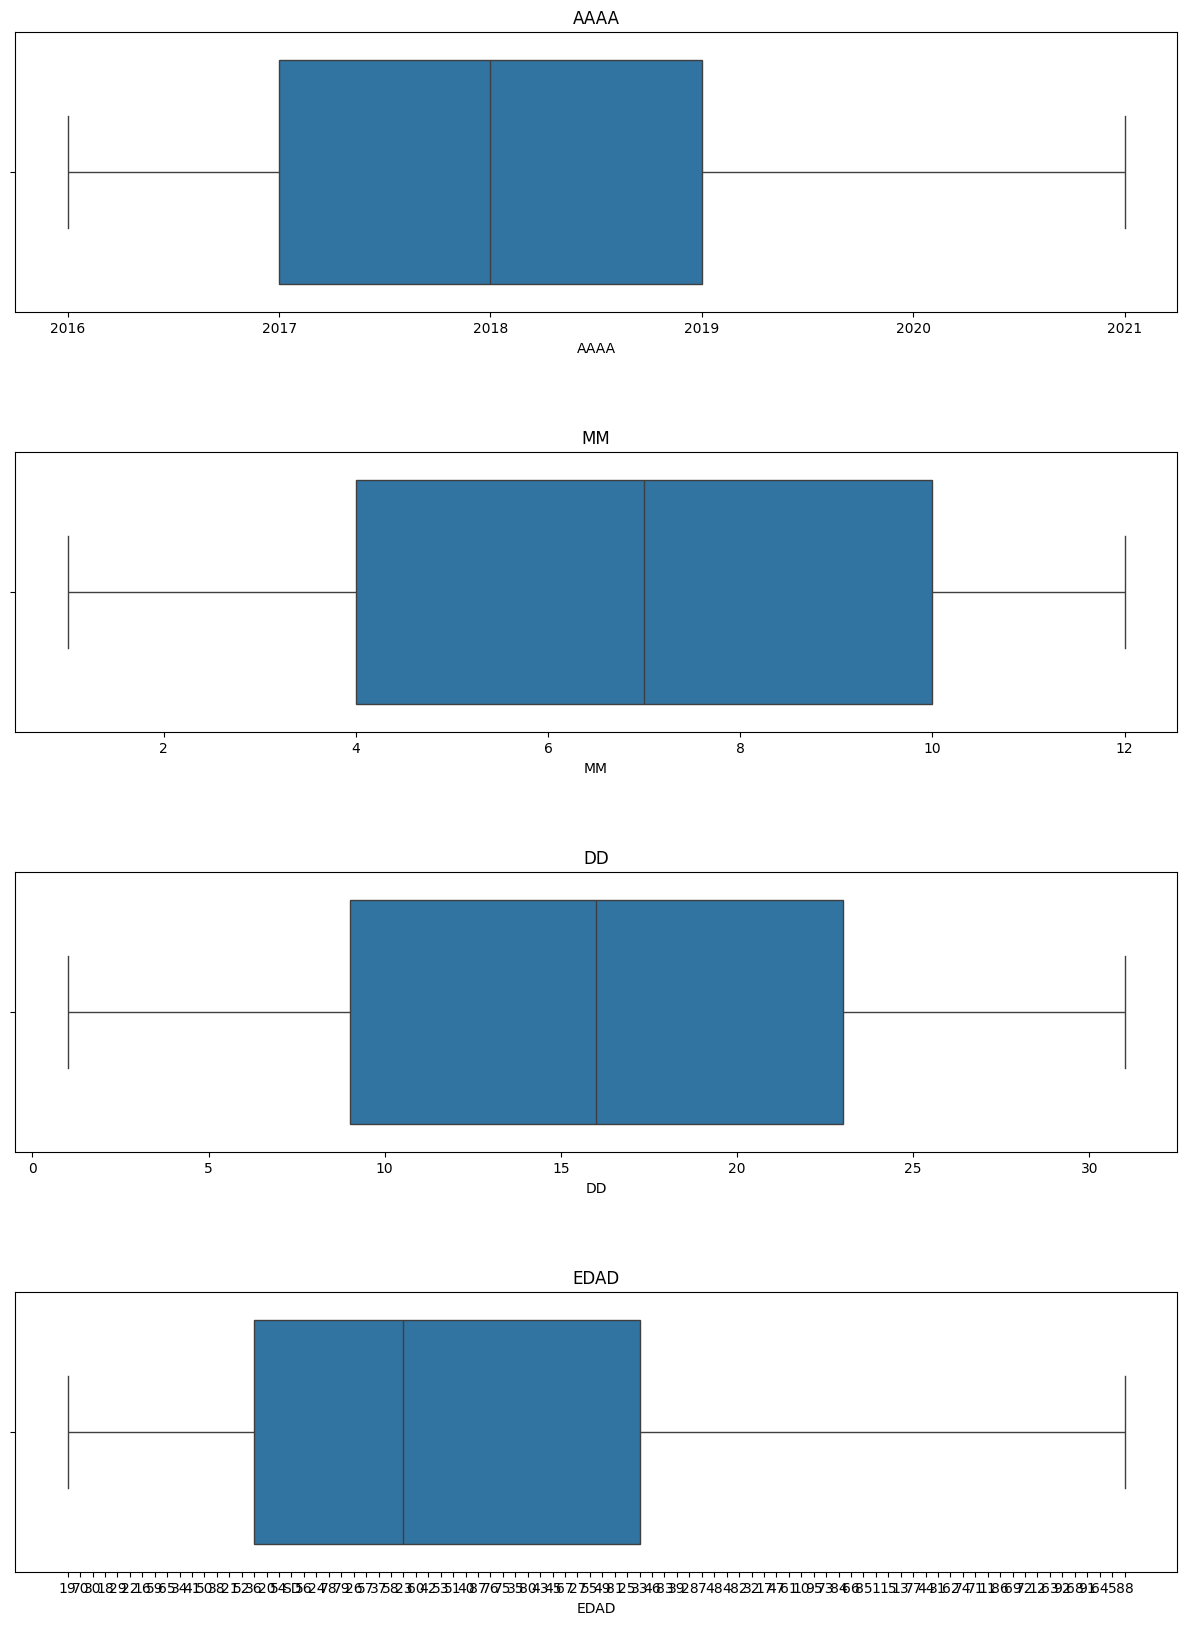

In [48]:
#Realizamos el mismo análisis para df_v
columns_v = ['AAAA','MM','DD','EDAD']
fig,ax = plt.subplots(nrows=4, ncols = 1,figsize=(15,20))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(columns_v):
          sns.boxplot(x=col, data=df_v, ax=ax[i])
          ax[i].set_title(col)

No observamos outliers por lo que el dataframe queda así

In [49]:
df_v.head(1)

,ID_hecho,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19


In [50]:
df_h.head(1)

,ID,N_VICTIMAS,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1.0,2016.0,1.0,1.0,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO,AUTO


### 5. Corregir el tipo de dato

In [51]:
#Convertimos todas estas columnas de df_h a tipo numérico
df_h['N_VICTIMAS'] = pd.to_numeric(df_h['N_VICTIMAS'],errors='coerce')
df_h['AAAA'] = pd.to_numeric(df_h['AAAA'],errors='coerce')
df_h['MM'] = pd.to_numeric(df_h['MM'],errors='coerce')
df_h['DD'] = pd.to_numeric(df_h['DD'],errors='coerce')
df_h['HH'] = pd.to_numeric(df_h['HH'],errors='coerce')
df_h['COMUNA'] = pd.to_numeric(df_h['COMUNA'],errors='coerce')
df_h['pos x'] = pd.to_numeric(df_h['pos x'],errors='coerce')
df_h['pos y'] = pd.to_numeric(df_h['pos y'],errors='coerce')

In [52]:
#Rellenamos los vacíos con 0's y convertimos a dato entero
df_h['AAAA'] = df_h['AAAA'].fillna(0).astype(int)
df_h['MM'] = df_h['MM'].fillna(0).astype(int)
df_h['DD'] = df_h['DD'].fillna(0).astype(int)
df_h['HH'] = df_h['HH'].fillna(0).astype(int)
df_h['COMUNA'] = df_h['COMUNA'].fillna(0).astype(int)
df_h['N_VICTIMAS'] = df_h['N_VICTIMAS'].fillna(0).astype(int)

In [53]:
#Convertimos todas estas columnas de df_v a dato numérico
df_v['AAAA'] = pd.to_numeric(df_v['AAAA'], errors='coerce')
df_v['MM'] = pd.to_numeric(df_v['MM'],errors='coerce')
df_v['DD'] = pd.to_numeric(df_v['DD'],errors='coerce')
df_v['EDAD'] = pd.to_numeric(df_v['EDAD'],errors='coerce')

In [54]:
#Rellenamos los vacíos con 0's y convertimos a dato entero
df_v['AAAA'] = df_v['AAAA'].fillna(0).astype(int)
df_v['MM'] = df_v['MM'].fillna(0).astype(int)
df_v['DD'] = df_v['DD'].fillna(0).astype(int)
df_v['EDAD'] = df_v['EDAD'].fillna(0).astype(int)


In [55]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 716
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID_hecho  717 non-null    object
 1   AAAA      717 non-null    int32 
 2   MM        717 non-null    int32 
 3   DD        717 non-null    int32 
 4   ROL       717 non-null    object
 5   VICTIMA   717 non-null    object
 6   SEXO      717 non-null    object
 7   EDAD      717 non-null    int32 
dtypes: int32(4), object(4)
memory usage: 39.2+ KB


In [56]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 695
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int32  
 2   AAAA                   696 non-null    int32  
 3   MM                     696 non-null    int32  
 4   DD                     696 non-null    int32  
 5   HH                     696 non-null    int32  
 6   LUGAR_DEL_HECHO        696 non-null    object 
 7   TIPO_DE_CALLE          696 non-null    object 
 8   Calle                  695 non-null    object 
 9   Cruce                  525 non-null    object 
 10  Dirección Normalizada  688 non-null    object 
 11  COMUNA                 696 non-null    int32  
 12  XY (CABA)              696 non-null    object 
 13  pos x                  684 non-null    float64
 14  pos y                  684 non-null    float64
 15  VICTIMA    

In [57]:
#A continuación realizaré un merge en Id, por lo que cambiaré el nombre de la columna para que sea la misma
df_v = df_v.rename(columns={'ID_hecho':'ID'})
df_v.head()

,ID,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29


### 6. Merge de las tablas para analizar

In [77]:
#Realizamos un merge e insertamos a un DataFrame
df_final = pd.merge(df_h,df_v,on='ID')

In [78]:
#Inspeccionamos los datos
df_final.head(3)

,ID,N_VICTIMAS,AAAA_x,MM_x,DD_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,...,pos y,VICTIMA_x,ACUSADO,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",...,-34.687570,MOTO,AUTO,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,...,-34.669777,AUTO,PASAJEROS,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,1,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,NaN,...,-34.631894,MOTO,AUTO,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30


In [79]:
#Procederemos a limpiar las columnas duplicadas y las que no nos sirva en el contexto
df_final = df_final.drop(columns=['AAAA_y','MM_y','DD_y','VICTIMA_y'])
df_final.head(2)

,ID,N_VICTIMAS,AAAA_x,MM_x,DD_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70


In [80]:
#Analizamos la cantidad de nulos
df_final.isna().sum()
#Inspeccionamos los nulos y observamos que hay muchos en cruce, por lo que procederé imputar datos

ID                         0
N_VICTIMAS                 0
AAAA_x                     0
MM_x                       0
DD_x                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                     13
pos y                     13
VICTIMA_x                  0
ACUSADO                    0
ROL                        0
SEXO                       0
EDAD                       0
dtype: int64

In [81]:
df_final['Cruce'].fillna('SD')
df_final['Calle'].fillna('SD')

0                  PIEDRA BUENA AV.
1                    PAZ, GRAL. AV.
2                    ENTRE RIOS AV.
3                    LARRAZABAL AV.
4                      SAN JUAN AV.
                   ...             
712                     RIESTRA AV.
713    DELLEPIANE, LUIS, TTE. GRAL.
714                       GAONA AV.
715                  PERON, EVA AV.
716             PADRE CARLOS MUJICA
Name: Calle, Length: 717, dtype: object

In [82]:
#Agregaré una nueva columna llamada MES que reemplazará a mes
nombres_meses_espanol = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

# Agregar una nueva columna 'Nombre_mes' que contenga el nombre del mes en español
df_final['MES'] = df_final['MM_x'].apply(lambda x: nombres_meses_espanol[x - 1])
df_final.head(2)

,ID,N_VICTIMAS,AAAA_x,MM_x,DD_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,...,COMUNA,XY (CABA),pos x,pos y,VICTIMA_x,ACUSADO,ROL,SEXO,EDAD,MES
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",...,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,enero
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,...,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,enero


In [83]:
#Renombamos columnas
df_final = df_final.rename(columns={'AAAA_x':'AÑO','MM_x':'N_MES','DD_x':'DIA','HH':'HORA','VICTIMA_x':'VICTIMA'})
df_final['MES'].unique()

array(['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio',
       'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
      dtype=object)

In [84]:
df_final.head(2)

,ID,N_VICTIMAS,AÑO,N_MES,DIA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,...,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,MES
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",...,8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19,enero
1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,...,9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,enero


In [85]:
#Le damos una última limpieza a los nulos antes de guardar en un csv
df_final = df_final.dropna(axis=0,how='all')

In [86]:
#Guardamos en un csv
df_final.to_csv(r"C:\Users\argui\OneDrive\Escritorio\Siniestros viales\Dataset\mergeETL.csv")

# EDA:

### 1. Análisis de Cantidad de víctimas por año

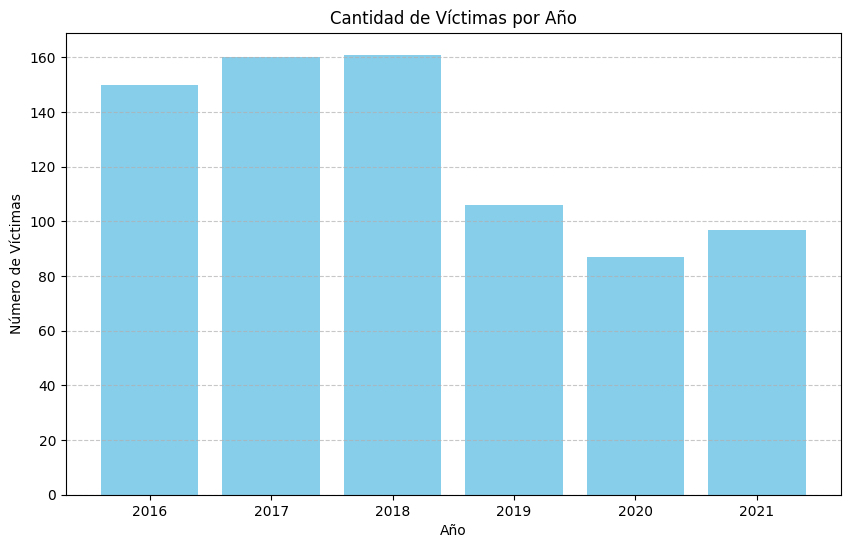

In [68]:
victimas_por_ano = df_final.groupby('AÑO')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_ano['AÑO'], victimas_por_ano['N_VICTIMAS'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.title('Cantidad de Víctimas por Año')
plt.xticks(victimas_por_ano['AÑO'])  # Asegura que todos los años sean mostrados en el eje x
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



Podemos observar, de los datos analizados, que hubo una disminución de los siniestros acentuada en 2020, donde se registraron menos hechos.
Hay que tener en cuenta que los datos corresponden a Ciudad Autónoma de Buenos Aires y en el año 2020 se vivió una situación muy particular de aislamiento como consecuencia de la pandemia de COVID. En Argentina, a través de un decreto de necesidad y urgencia se limitó la circulación de las personas.

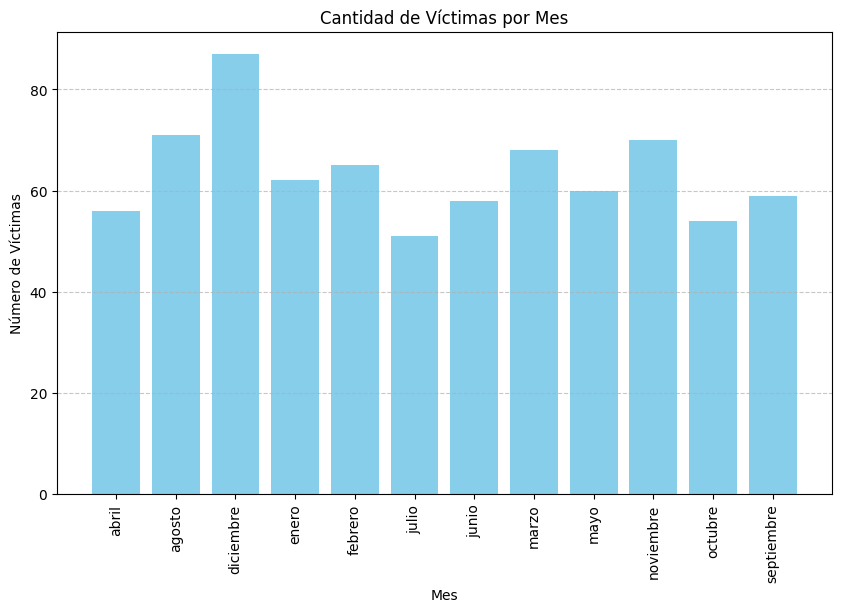

In [69]:
victimas_por_mes = df_final.groupby('MES')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_mes['MES'], victimas_por_mes['N_VICTIMAS'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Número de Víctimas')
plt.title('Cantidad de Víctimas por Mes')
plt.xticks(victimas_por_mes['MES'], rotation=90)  # Asegura que todos los meses sean mostrados en el eje x
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()




Se puede observar que el mes con mayor cantidad de muertos es el mes de diciembre

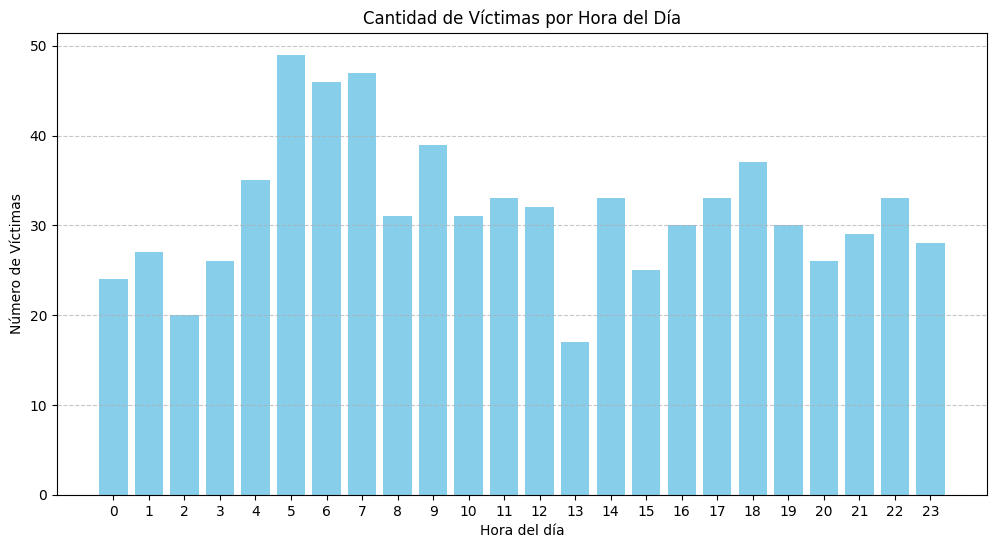

In [70]:
import matplotlib.pyplot as plt

# Paso 1: Agrupa los datos por hora y calcula la cantidad de víctimas para cada hora
victimas_por_hora = df_final.groupby('HORA')['N_VICTIMAS'].sum().reset_index()

# Paso 2: Crea un gráfico de barras para mostrar la cantidad de víctimas por hora
plt.figure(figsize=(12, 6))
plt.bar(victimas_por_hora['HORA'], victimas_por_hora['N_VICTIMAS'], color='skyblue')
plt.xlabel('Hora del día')
plt.ylabel('Número de Víctimas')
plt.title('Cantidad de Víctimas por Hora del Día')
plt.xticks(victimas_por_hora['HORA'])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos obersar que los siniestros viales tienden a suceder con mayor frecuencia entre las 4 y las 9 de la mañana

In [71]:
df_final.head(1)

,ID,N_VICTIMAS,AÑO,N_MES,DIA,HORA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,...,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,MES
0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",...,8,Point (98896.78238426 93532.43437792),-58.47534,-34.68757,MOTO,AUTO,CONDUCTOR,MASCULINO,19,enero


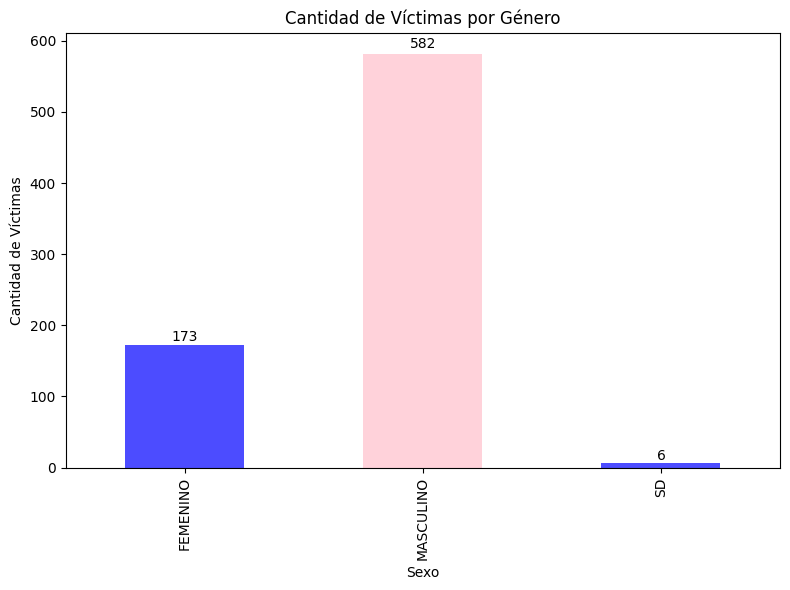

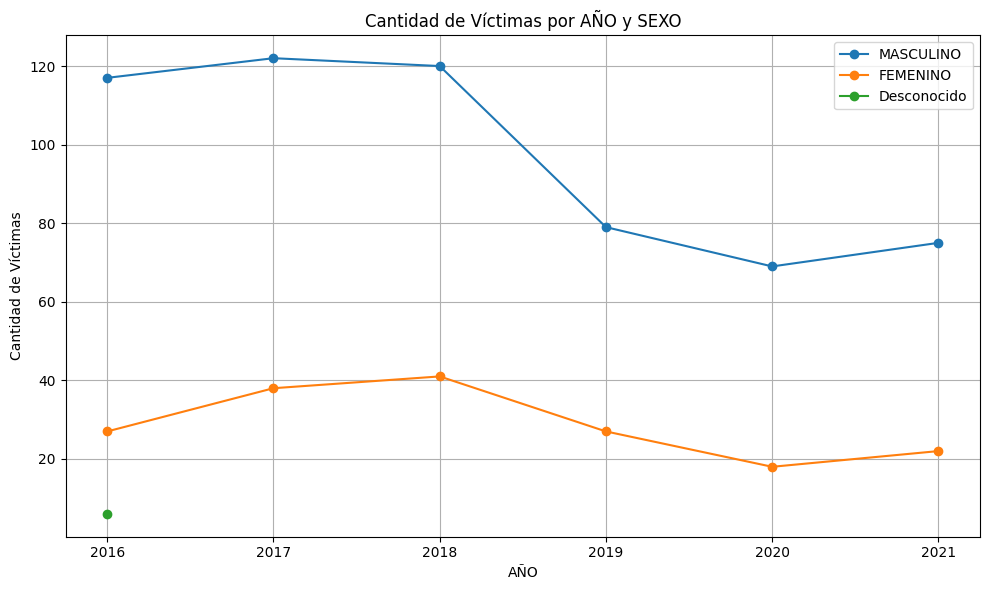

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la cantidad de víctimas masculinas y femeninas
victimas_por_sexo = df_final.groupby('SEXO')['N_VICTIMAS'].sum()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
victimas_por_sexo.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Género')

# Añadir etiquetas a las barras
for i, valor in enumerate(victimas_por_sexo):
    plt.text(i, valor + 0.005 * valor, str(valor), ha='center', va='bottom')  # Ajusta el valor 0.05 según sea necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# ////////////////////////////////////////////////////////////////////////////////////////////////


# Filtrar el DataFrame por sexo masculino, femenino y desconocido
df_masculino = df_final[df_final['SEXO'] == 'MASCULINO']
df_femenino = df_final[df_final['SEXO'] == 'FEMENINO']
df_desconocido = df_final[df_final['SEXO'] == 'SD']

# Agrupar por año y sumar la cantidad de víctimas para cada sexo
victimas_por_año_masculino = df_masculino.groupby('AÑO')['N_VICTIMAS'].sum()
victimas_por_año_femenino = df_femenino.groupby('AÑO')['N_VICTIMAS'].sum()
victimas_por_año_desconocido = df_desconocido.groupby('AÑO')['N_VICTIMAS'].sum()

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la cantidad de víctimas por año para sexo masculino
plt.plot(victimas_por_año_masculino.index, victimas_por_año_masculino.values, marker='o', label='MASCULINO')

# Graficar la cantidad de víctimas por año para sexo femenino
plt.plot(victimas_por_año_femenino.index, victimas_por_año_femenino.values, marker='o', label='FEMENINO')

# Graficar la cantidad de víctimas por año para sexo desconocido
plt.plot(victimas_por_año_desconocido.index, victimas_por_año_desconocido.values, marker='o', label='Desconocido')

# Añadir etiquetas y título
plt.xlabel('AÑO')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por AÑO y SEXO')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()



Podemos observar en el primer gráfico de barras que la cantidad de victimas masculinas es mucho mayor a la cantidad de victimas masculinas y que tienen cierta correlación debido a que se puede observar en el grafico de línea, que cuando uno aumenta, el otro también y cuando uno disminuye, el otro también

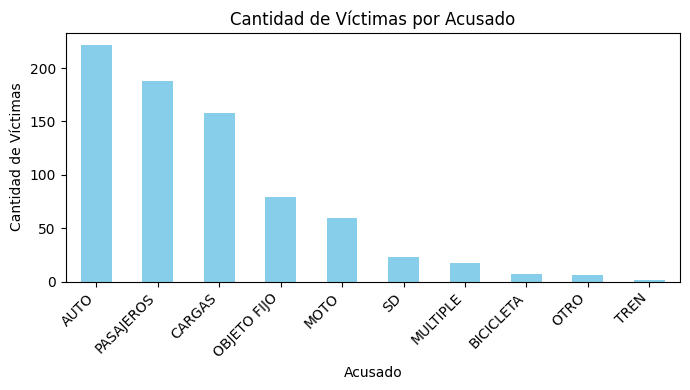

In [73]:
# Agrupar por acusado y sumar la cantidad de víctimas para cada uno
victimas_por_acusado = df_final.groupby('ACUSADO')['N_VICTIMAS'].sum()

# Ordenar los datos por la cantidad de víctimas de manera descendente
victimas_por_acusado = victimas_por_acusado.sort_values(ascending=False)

# Crear una figura y ejes para el gráfico de barras
plt.figure(figsize=(7, 4))

# Crear el gráfico de barras
victimas_por_acusado.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Acusado')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Acusado')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En este gráfico de barras, podemos observar que el vehículo con más víctimas es el auto

<Figure size 1100x600 with 0 Axes>

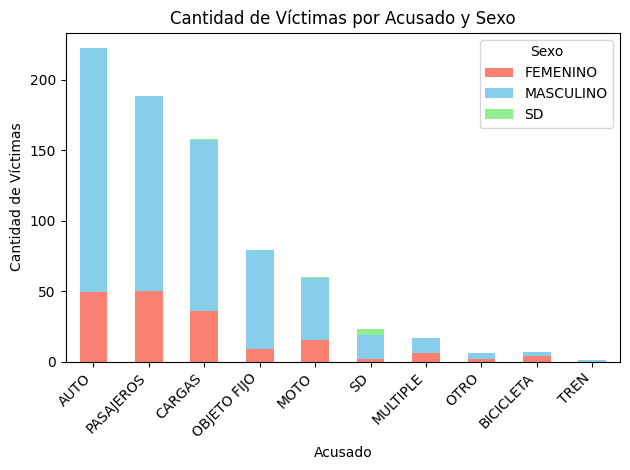

In [74]:
# Agrupar por acusado y sexo, y sumar la cantidad de víctimas para cada uno
victimas_por_acusado_sexo = df_final.groupby(['ACUSADO', 'SEXO'])['N_VICTIMAS'].sum()

# Desapilar el índice para tener 'ACUSADO' y 'SEXO' como columnas
victimas_por_acusado_sexo = victimas_por_acusado_sexo.unstack()

# Ordenar los datos por la cantidad total de víctimas de manera descendente
victimas_por_acusado_sexo = victimas_por_acusado_sexo.sort_values(by='MASCULINO', ascending=False)

# Colores para cada valor único en la columna 'SEXO'
colors = {'MASCULINO': 'skyblue', 'FEMENINO': 'salmon', 'SD': 'lightgreen'}

# Crear una figura y ejes para el gráfico de barras
plt.figure(figsize=(11, 6))

# Crear el gráfico de barras con barras apiladas
victimas_por_acusado_sexo.plot(kind='bar', stacked=True, color=[colors[col] for col in victimas_por_acusado_sexo.columns])

# Añadir etiquetas y título
plt.xlabel('Acusado')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Acusado y Sexo')

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Sexo')
plt.show()


Como podemos observar en este gráfico de barras apiladas, podemos observar que no solamente el sexo masculino predomina en las víctimas, sino también en los acusados